# Modelos de Regresión Lineal
## Modelo con datos simulados
* y = a + b * x
* X : 100 valores distribuídos según una N(1.5, 2.5)
* Ye = 5 + 1.9 * x + e
* e estará distribuído según una N(0, 0.8)

In [1]:
import pandas as pd
import numpy as np

In [2]:
x = 1.5 + 2.5 * np.random.randn(100)

In [3]:
res = 0 + 0.8 * np.random.randn(100)

In [4]:
y_pred = 5 + 0.3 * x

In [5]:
y_act = 5 + 0.3 * x + res

In [6]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [7]:
data = pd.DataFrame(
    {
        "x":x_list,
        "y_actual":y_act_list,
        "y_prediccion":y_pred_list
    }
)

In [8]:
data.head()

,x,y_actual,y_prediccion
0,2.604837,4.531895,5.781451
1,7.160458,6.746876,7.148137
2,2.179386,6.590964,5.653816
3,5.529983,6.200482,6.658995
4,-0.406269,5.995201,4.878119


In [9]:
import matplotlib.pyplot as plt

In [10]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor Actual vs Predicción')

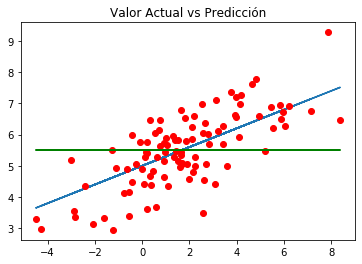

In [11]:
%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.title("Valor Actual vs Predicción")

## ¿Como es la predicción de buena?
* SST = SSD + SSR
* SST : Variabilidad de los datos con respecto de su media
* SSD : Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (errores que deberían seguir una distribución normal)
* SSR : Diferencia entre la regresión y el valor medio que el modelo busca explicar
* R2 = SSR / SST, coeficiente de determinación entre 0 y 1

In [12]:
y_m = np.mean(y_act)
data["SSR"]=(data["y_prediccion"]-y_m)**2
data["SSD"]=(data["y_prediccion"]-data["y_actual"])**2
data["SST"]=(data["y_actual"]-y_m)**2

In [13]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,2.604837,4.531895,5.781451,0.074285,1.561390,0.954534
1,7.160458,6.746876,7.148137,2.687105,0.161011,1.532589
2,2.179386,6.590964,5.653816,0.021001,0.878247,1.170867
3,5.529983,6.200482,6.658995,1.322722,0.210234,0.478289
4,-0.406269,5.995201,4.878119,0.397882,1.247871,0.236490


In [14]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [15]:
SSR

55.17690725276852

In [16]:
SSD

65.00380002745084

In [17]:
SST

137.02212748574834

In [18]:
SSR+SSD

120.18070728021937

In [19]:
R2 = SSR/SST

In [20]:
R2

0.40268610818721573

(array([ 1., 10., 10., 19., 19., 17., 12.,  7.,  4.,  1.]),
 array([-1.92154727, -1.50143569, -1.08132412, -0.66121255, -0.24110098,
         0.1790106 ,  0.59912217,  1.01923374,  1.43934531,  1.85945689,
         2.27956846]),
 <a list of 10 Patch objects>)

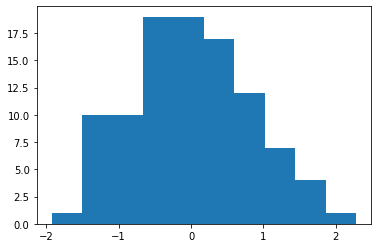

In [21]:
plt.hist(data["y_prediccion"]-data["y_actual"])

## Obteniendo la recta de regresión 

* y = a + b * x
* b = sum((xi - x_m)*(y_i-y_m))/sum((xi-x_m)^2)
* a = y_m - b * x_m

In [22]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.7494367386570968, 5.508898233799381)

In [23]:
data["beta_n"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean)
data["beta_d"] = (data["x"]-x_mean)**2

In [24]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [25]:
alpha = y_mean - beta * x_mean

In [26]:
alpha, beta

(4.90369276802037, 0.34594304121198394)

El modelo lineal obtenido por regresión es:
y = 5.042341442370516 + 1.9044490309709992 * x

In [27]:
data["y_model"] = alpha + beta * data["x"]

In [28]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,2.604837,4.531895,5.781451,0.074285,1.561390,0.954534,-0.835729,0.731710,5.804818
1,7.160458,6.746876,7.148137,2.687105,0.161011,1.532589,6.698723,29.279149,7.380803
2,2.179386,6.590964,5.653816,0.021001,0.878247,1.170867,0.465234,0.184857,5.657636
3,5.529983,6.200482,6.658995,1.322722,0.210234,0.478289,2.614566,14.292529,6.816752
4,-0.406269,5.995201,4.878119,0.397882,1.247871,0.236490,-1.048325,4.647066,4.763147


In [29]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_mean)**2)

In [30]:
SSR, SSD, SST

(73.33717720603047, 63.684950279717924, 137.0221274857483)

In [31]:
R2 = SSR / SST
R2

0.5352214168011534

Text(0.5, 1.0, 'Valor Actual vs Predicción')

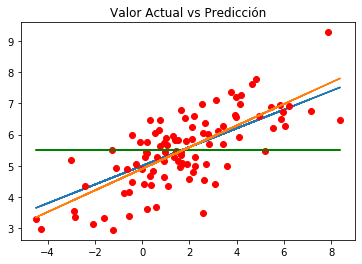

In [32]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor Actual vs Predicción")

## Error estándar de los residuos (RSE)

In [33]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.8061305300171264

In [34]:
np.mean(data["y_actual"])

5.508898233799381

In [35]:
RSE / np.mean(data["y_actual"])

0.14633244177051238